In [1]:
import IPython

## Generiranje glasbe z arhitekturo nevroskih mrež Transformer


### Music Transformer

MusicTransformer je nevronska mreža, ki se uporablja za generiranje glasbe. Ta model temelji na arhitekturi Transformer, ki je bila prvotno razvita za obdelavo naravnega jezika, vendar se je kasneje uspešno uporabila tudi za druge naloge, kot je generiranje glasbe.

Glasbeno generiranje je kompleksen problem, saj vključuje ustvarjanje melodij, harmonij, ritma in drugih glasbenih elementov, ki tvorijo skladbo. MusicTransformer se ukvarja s to nalogo tako, da se nauči vzorcev in strukture glasbe iz obstoječega glasbenega korpusa. To mu omogoča, da generira novo glasbo, ki je podobna tisti, ki jo je naučen izvajati.

Arhitektura Transformer je sestavljena iz več plasti samopozicioniranja in večplastnih perceptronov, ki omogočajo globoko učenje in združevanje informacij iz preteklih in prihodnjih delov glasbe. Model uporablja mehanizem samopozicioniranja, ki omogoča, da se vsak del generirane glasbe poveže z drugimi deli v skladbi, tako da ima celotna skladba smiselno strukturo in kontinuiteto.

Pri generiranju glasbe MusicTransformer prejme začetni vzorec ali nekaj začetnih not in nato generira nadaljnje glasbene segmente na podlagi tega vzorca. V procesu generiranja model uporablja metode, ki temeljijo na verjetnosti različnih glasbenih dogodkov glede na vzorce, ki jih je naučen iz obstoječega korpusa.

Ena izmed izzivov generiranja glasbe s pomočjo MusicTransformer je zagotoviti, da je generirana glasba ustvarjalna in raznolika, hkrati pa ohranja glasbeno strukturo in harmonijo. Prevelika podobnost generirane glasbe z učnim korpusom lahko povzroči, da je rezultat dolgočasen in preveč predvidljiv. Nasprotno, prevelika raznolikost lahko pripelje do glasbe, ki ni smiselna ali nezadovoljiva za poslušanje.

Zato je potrebno skrbno uravnoteženje med kreativnostjo in konsistenco pri generiranju glasbe s pomočjo MusicTransformer. To vključuje prilagajanje različnih hiperparametrov da se doseže želeni rezultat.

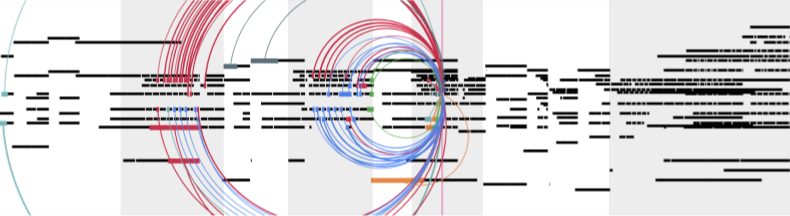

### Rešitev problema

Reševanja problema sem se lotil z nevronsko mrežo imenovano MusicTransformer. Njena glavna prednost je zmožnost zajemanja dolgoročnih odvisnosti v glasbi, kar pomaga pri ustvarjanju smiselnih glasbeni sekvenc. Samopozicijska pozornost pa omogoča nevronski mreži, da se nauči, kako upoštevati različne dele zaporedja, ne glede na njihov položaj. V procesu generiranja glasbe model prejme začetni del sekvence in nato postopoma generira naslednje glasbene enote.

Generiranje glasbe s pomočjo MusicTransformerja je še vedno aktivno področje raziskav in zato obstaja veliko izzivov, kot so dolgoročna konsistenca, ekspresivnost, ustvarjanje originalnosti, upoštevanje sloga in žanra.

Za podatkovno množico sem si izbral Maestro, ki vsebuje 200 ur klavirske glasbe v MIDI formatu, s katerim je precej preprosto delati. S pomočjo takšne podatkovne množice sta učenje in evaluacija učinkovita.


### Podatkovna množica

#### [Maestro V3.0.0](https://magenta.tensorflow.org/datasets/maestro#v300)

Dataset, sestavljen iz približno 200 ur virtuoznih klavirskih nastopov v MIDI in audio formatu. Datoteke MIDI vključujejo podatke o hitrosti udarcev in položaje pedala na klavirju. Audio in MIDI datoteke so poravnane z natančnostjo približno 3 ms in razrezane na posamezne skladbe. Te so označene s skladateljem, naslovom in letom izvedbe. Nestisnjen zvok je CD kakovost ali višje (44,1–48 kHz 16-bit PCM stereo).

Repertoar vsebuje večinoma klasično glasbo, vključno s skladatelji od 17. do začetka 20. stoletja.


In [ ]:
IPython.display.Audio(filename="./examples/MIDI-Unprocessed_example.wav")

### Implementacija

#### Model

Transformer je arhitektura nevronske mreže, ki je revolucionirala različne naloge obdelave naravnega jezika (NLP), vključno s strojnim prevajanjem in generiranjem besedil. Predstavljena je bila v članku "Attention Is All You Need" avtorjev Vaswani et al. leta 2017.

Ključna ideja za Transformer je uporaba mehanizmov samopozornosti (self-attention), ki zajamejo odvisnosti med različnimi besedami oz. elementi v zaporedju. Za razliko od ponavljajočih nevronskih mrež (RNN) ali konvolucijskih nevronskih mrež (CNN), Transformerji ne temeljijo na zaporednem procesiranju ali fiksnih sprejemnih poljih, ampak obdelajo celoten vhod naenkrat.

Sestavni deli Transformerja so:
* Kodirnik in dekodirnik: Kodirnik obdela vhodno zaporedje in zajame njegovo reprezentacijo, medtem ko dekodirnik generira izhodno zaporedje na podlagi te reprezentacije.
* Mehanizem pozornosti: Omogoča, da se za vsak element osredotoči tudi na ostale elemente in upošteva njihove odvisnosti.
* Multiple attention heads: Vsaka plast v Transformerju ima več pozornostnih glav, kar omogoča zajemanje različnih vrst odvisnosti.
* Pozicijsko kodiranje: Ker nimajo vgrajenega smisla o vrstnem redu elementov, se uporablja pozicijsko kodiranje, ki zagotavlja informacije o poziciji posameznega elementa v vhodnem zaporedju.
* Prehodna mreža (Feed-Forward Network): uporablja se za izvedbo transformacij na izhodih samopozornosti. 

<img src="./examples/Transformer-Attention-Mechanism.jpg" height="400">

MusicTransformer na podlagi Transformer arhitekture nevronskih mrež. 

Sestavljen je iz:
* N dekodirnih plasti, ki so odgovorne za procesiranje vhoda
  * Plast z mehanizmom pozornosti (Self-Attention Layer): odgovorna za odvisnosti med elementi
  * Prehodna plast (Feed-Forward Layer): nad izhodom Self-Attention plasti izvede nelinearno transformacijo
  * Na koncu je linearna plast velikosti d, ki izračuna verjetnost pojavitve določene note
* Končna linearna plast, ki predstavlja verjetnost pojavitve različnih not

In [ ]:
with open("model.py", "r") as file:
    content = file.read()
print(content)

#### Predprocesiranje podatkov

Preden so datoteke v podatkovni množici primerne za učenje, jih je potrebno predprocesirati. To storimo v naslednjih korakih:
* Branje in dekodiranje MIDI datotek
* Za vsako datoteko zberemo podatke o notah za vsak instrument
* Za vsako noto shranimo podatek o času, hitrosti in pedalih v pickle datoteko

In [ ]:
with open("process_midi.py", "r") as file:
    content = file.read()
print(content)

In [ ]:
with open("processor.py", "r") as file:
    content = file.read()
print(content)

#### Učenje

Potek učenja:
* Naložimo podatkovno množico
* Inicializiramo model, kriterij, optimizator (Adam) in razporejevalnik (Noam)
* Zaženemo učno zanko za določeno število epoh
  * pridobimo vhodno in ciljno zaporedje iz podatkovne množice
  * vhodno zaporedje spustimo čez model, ki nam da izhodno zaporedje
  * izračunamo izgubo med izhodnim in ciljnim zaporedjem
  * ustrezno posodobimo parametre modela
  * validiramo vsakih b epoh
  * shranimo model glede na najmanjšo izgubo pri validaciji
  * shranimo končno točko modela

### Analiza

In [ ]:
%load_ext tensorboard

#### Napredek učenja

Vsi posnetki vsebujejo 1024 not, različne dolžine pa imajo zaradi različnih pavz med notami.

1. epoha:

In [ ]:
IPython.display.Audio(filename="./examples/midi_epoch-0000.wav")

50. epoha:

In [ ]:
IPython.display.Audio(filename="./examples/midi_epoch-0049.wav")

100. epoha:

In [ ]:
IPython.display.Audio(filename="./examples/midi_epoch-0099.wav")

150. epoha:

In [ ]:
IPython.display.Audio(filename="./examples/midi_epoch-0149.wav")

200. epoha:

In [ ]:
IPython.display.Audio(filename="./examples/midi_epoch-0199.wav")

250. epoha:

In [ ]:
IPython.display.Audio(filename="./examples/midi_epoch-0249.wav")

#### Accuracy

<img src="./examples/Graphs/accuracy.png" alt=“Accuracy” height="200">

<img src="./examples/Graphs/accuracy_comparison.png" alt="Accuracy Comparison" height="200">


#### Cross entropy loss

<img src="./examples/Graphs/cross_entropy_loss.png" alt="Cross Entropy Loss" Comparison height="200">

<img src="./examples/Graphs/cross_loss_comparison.png" alt="Cross Loss Comparison" height="200">


#### Smooth cross entropy loss

<img src="./examples/Graphs/smooth_cross_entropy_loss.png" alt="Smooth Cross Entropy Loss" height="200">

<img src="./examples/Graphs/smooth_loss_comparison.png" alt="Smooth Loss Comparison" height="200">

Opaziti je možno, da pride okoli 150. epohe do overfittanja.

### Zaključek

V sklopu te seminarske naloge sem implementiral generiranje glasbe z arhitekturo nevronskih mrež Transformer. Nevronsko mrežo sem učil s pomočjo podatkovne množice MAESTRO, ki vsebuje MIDI datoteke.

V prihodnje bi lahko dodal podporo za različne žanre, predvsem pa bi lahko povečal število epoh, da bi videl ali se overfitting nadaljuje v istem stilu in ga nato ustrezno popraviti.

Čas učenja ene epohe je bil približno 1:45 minut z vključeno CUDA arhitekturo. Čas učenja ene epohe samo z uporabo CPU traja več kot 30 minut. Za vseh 200 epoh je bilo potrebnih skoraj 6 ur.

Poraba pomnilnika je bila konstanta, okoli 1.5 GB, poraba grafičnega pomnilnika pa okoli 3 GB.